In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c = load_breast_cancer()

rng = np.random.RandomState(47)
noise = rng.normal(size=(len(c.data), 50))
X_w_noise = np.hstack([c.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, c.target, random_state=0, test_size=.5)

selectPerc = SelectPercentile(percentile=50)
selectPerc.fit(X_train, y_train)
X_train_selected = selectPerc.transform(X_train)

print('Форма массива X_train: {}'.format(X_train.shape))
print('Форма массива X_train_selected: {}'.format(X_train_selected.shape))

Форма массива X_train: (284, 80)
Форма массива X_train_selected: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False  True False False False False
  True False False  True False False False False False False False False
  True False False False False False False False False False  True  True
 False  True False False False False  True False  True  True False  True
  True False  True  True False False False False]


Text(0.5, 0, 'Индекс примера')

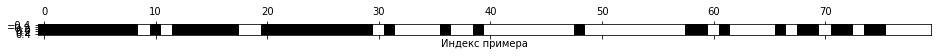

In [3]:
mask = selectPerc.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Индекс примера')

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
X_test_selected = selectPerc.transform(X_test)

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
print('Правильность со всеми признаками: {:.3f}'.format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print('Правильность только с отобранными признаками: {:.3f}'.format(
    lr.score(X_test_selected, y_test)))

Правильность со всеми признаками: 0.912
Правильность только с отобранными признаками: 0.940


C:\Program Files\Microsoft SQL Server\150\PYTHON_SERVER\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Microsoft SQL Server\150\PYTHON_SERVER\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
